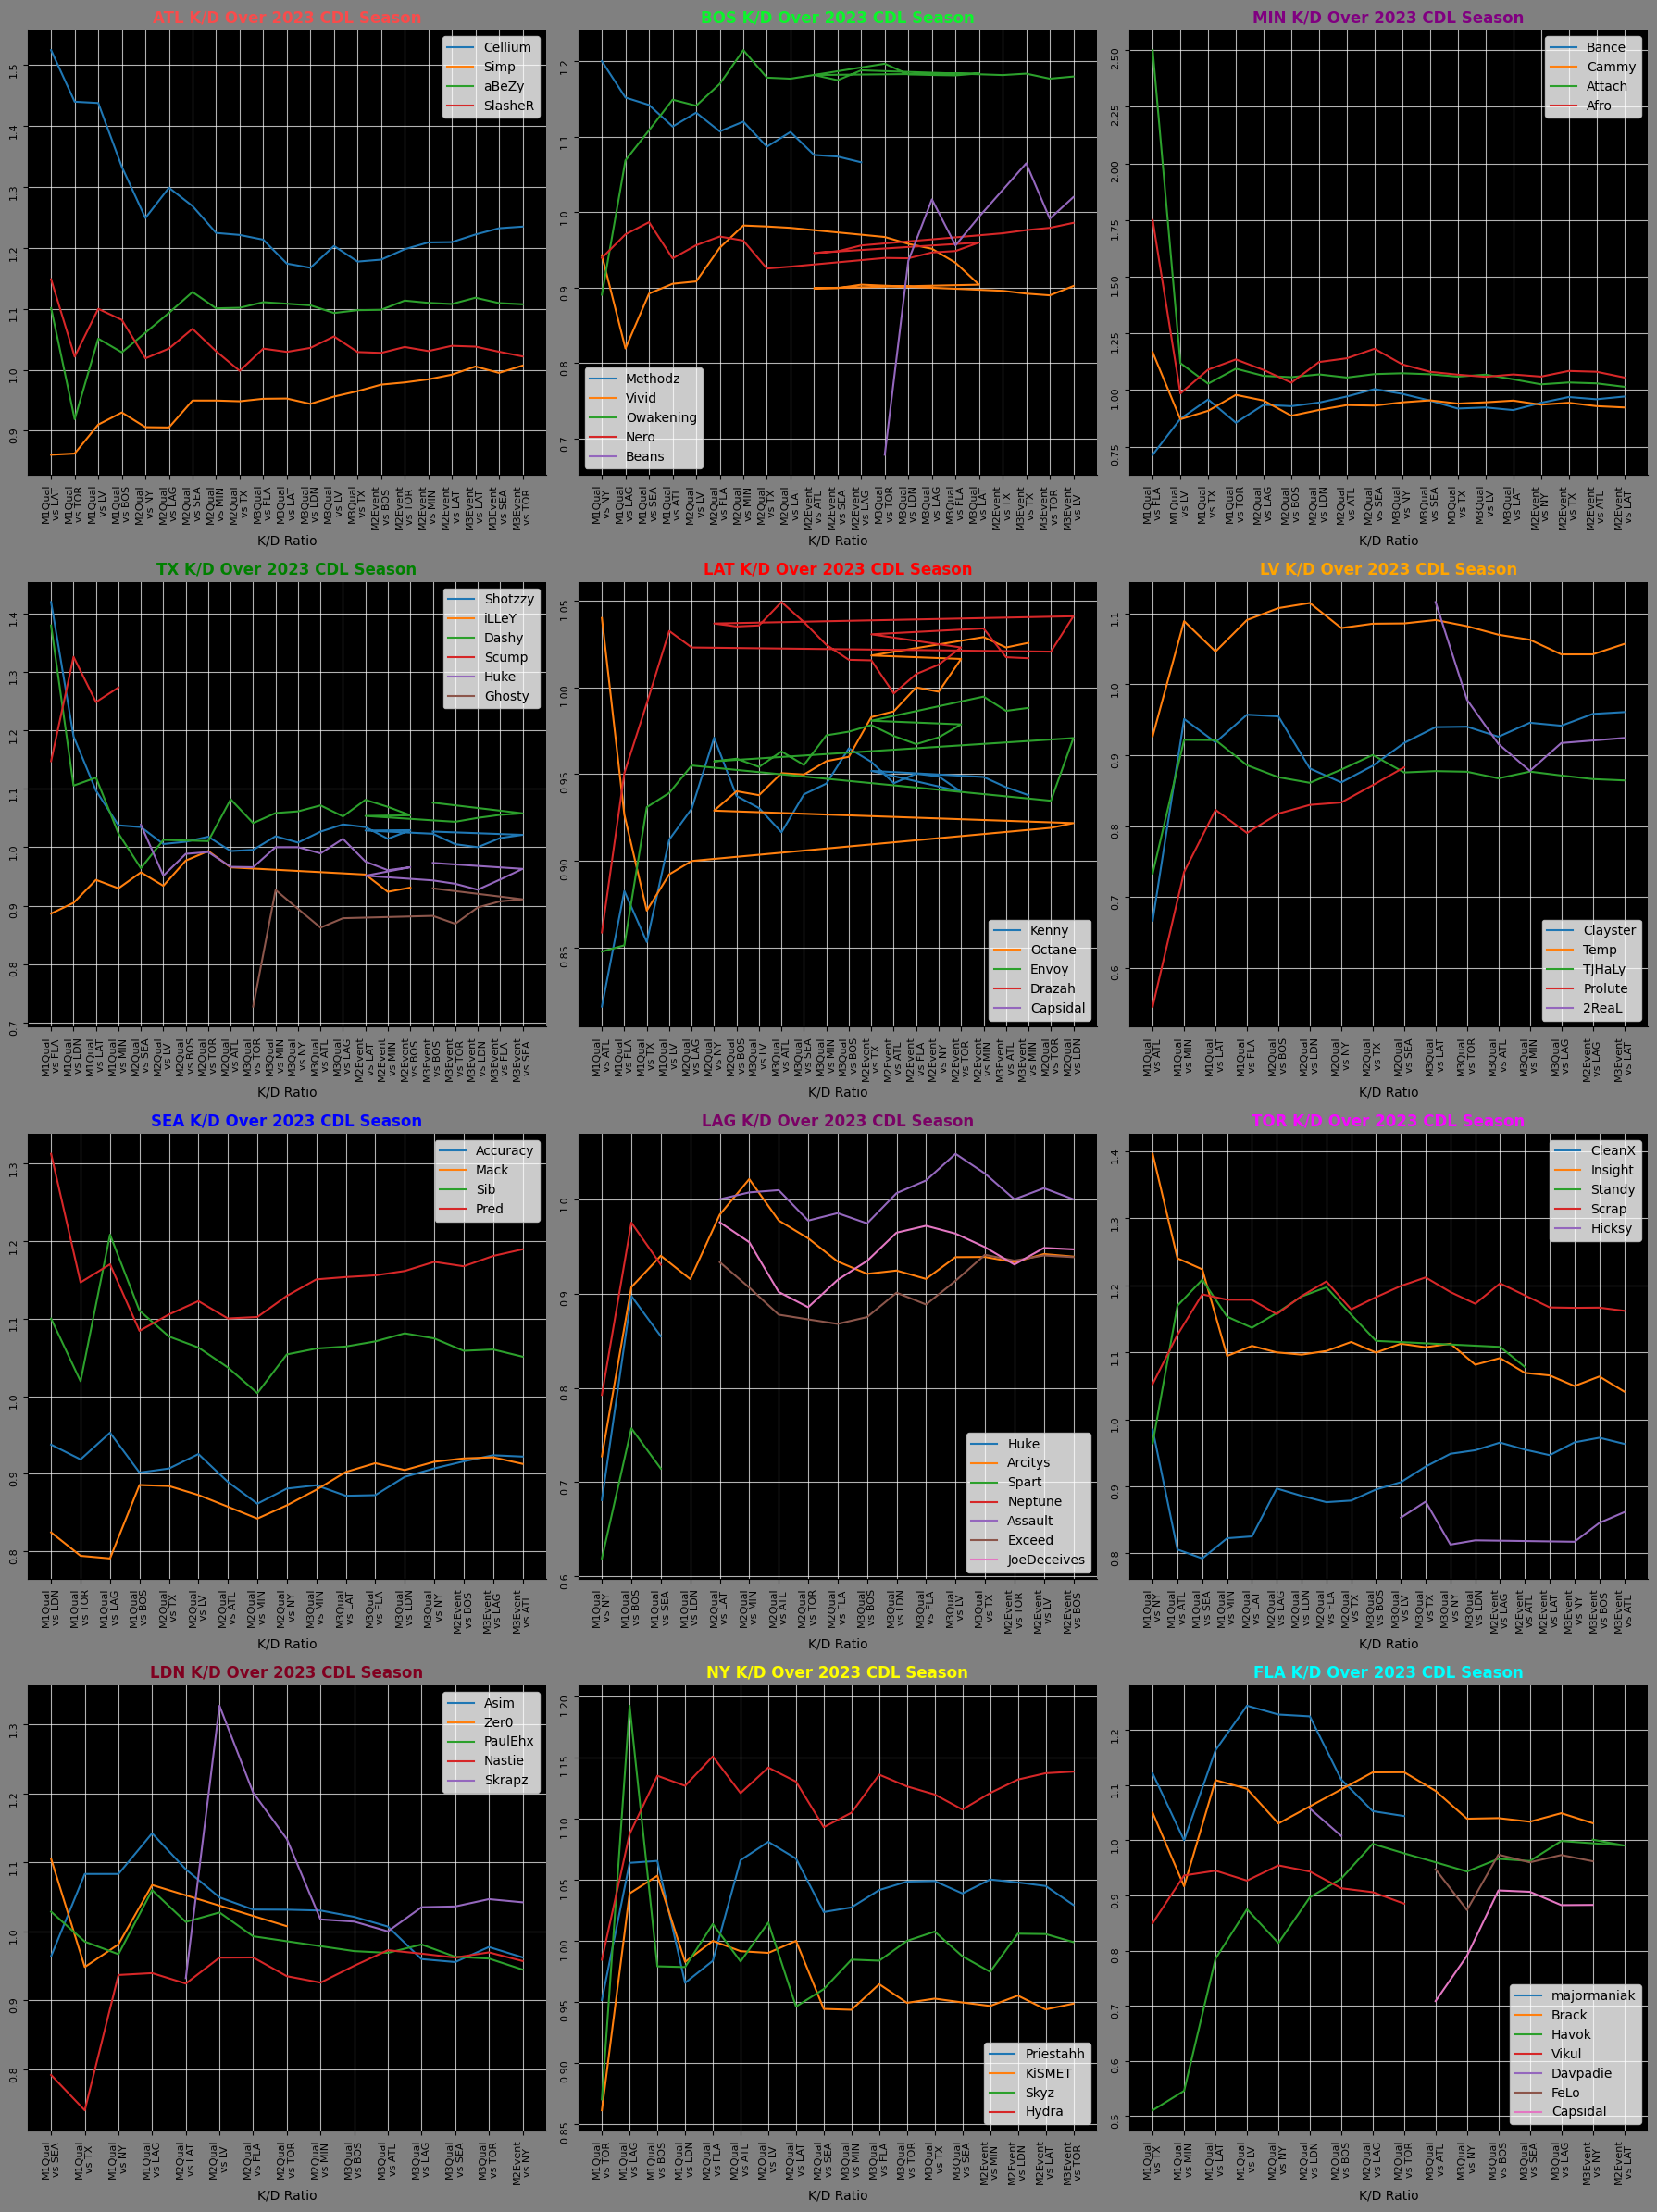

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cdl_helper import read_in_all_matches, CDL_PALETTE

df = read_in_all_matches()

def kd_over_time(df, player_alias, team):
    """
    Desc: A function to get a players overall KD over time
    Params:
        df (pandas df)
        player_alias (string)
    Returns:
        all_kds (list), matches (list)
        all_kds = List of kd progression (y axis)
        matches = List of match details (x axis)
    """
    team_df = df[df['abbrev']==team]
    player_df = team_df[team_df['alias']==player_alias].sort_values('matchDate', ascending=False)
    series_df = player_df.groupby(['matchGame.matchId', 'event', 'alias', 'oppo_abbrev']).sum().reset_index()
    matches = []
    all_kds = []
    for i in range(1, len(series_df['matchGame.matchId'])):
        cur_matches = series_df.iloc[:i]
        matches.append(f"{cur_matches['event'][len(cur_matches)-1]}\nvs {cur_matches['oppo_abbrev'][len(cur_matches)-1]}")
        one_row = cur_matches.groupby('alias').sum().reset_index()
        one_row['kd'] = one_row['totalKills']/one_row['totalDeaths']
        all_kds.append(one_row['kd'][0].round(4))
    return all_kds, matches

def plot_kd_over_time(df, player_alias, axis, team):
    y, x = kd_over_time(df=df, player_alias=player_alias, team=team)
    axis.plot(x, y, label=player_alias)
    axis.tick_params(rotation=90, direction='out', labelsize=8)
    axis.set_xlabel("Match")
    axis.set_xlabel("K/D Ratio")
    axis.set_title(f"{player_alias} K/D Over 2023 CDL Season")
    axis.spines[['top', 'right']].set_visible(False)
    axis.legend()

def plot_kd_over_time_fullteam(df, team_abbrev, axis, colour):
    players = df[df['abbrev']==team_abbrev]['alias'].unique()
    for player, alph in zip(players, np.linspace(0.5, 1, len(players))):
        plot_kd_over_time(df, player, axis, team_abbrev)
    axis.set_title(f"{team_abbrev} K/D Over 2023 CDL Season", color=colour, y=1, weight="bold")


fig = plt.figure(figsize=(18, 24), tight_layout=True)
axis = fig.subplots(ncols=3, nrows=4)

for ax, team in zip(axis.reshape(1, 12)[0], df['abbrev'].unique()):
    plot_kd_over_time_fullteam(df, team, ax, CDL_PALETTE[team])
    ax.set_facecolor('black')
    ax.grid(color='white', alpha=0.7)
fig.set_facecolor("grey")





In [3]:
df[df['alias']=='Hydra'][['matchDate', 'event']].sort_values('matchDate', ascending=False).head(30)

,matchDate,event
7,2023-03-31T23:32:58.564Z,M1Qual
15,2023-03-31T23:32:58.564Z,M1Qual
6,2023-03-31T23:32:58.564Z,M3Qual
38,2023-03-31T23:32:58.564Z,M3Qual
30,2023-03-31T23:32:58.564Z,M3Qual
22,2023-03-31T23:32:58.564Z,M3Qual
14,2023-03-31T23:32:58.564Z,M3Qual
6,2023-03-31T23:32:58.564Z,M3Qual
30,2023-03-31T23:32:58.564Z,M2Qual
22,2023-03-31T23:32:58.564Z,M2Qual
